# BERT

Text(0.5, 1.0, 'Sentiment Distribution')

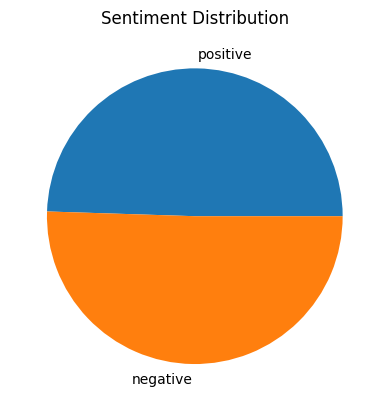

In [ ]:
plt.pie([len(positive),len(negative)], labels = imdb_df['sentiment'].unique())
plt.title('Sentiment Distribution')

In [ ]:
imdb_df.duplicated().sum()

3

In [ ]:
imdb_df.drop_duplicates(inplace=True)
positive = imdb_df.loc[imdb_df['sentiment'] == 'positive']
negative = imdb_df.loc[imdb_df['sentiment'] == 'negative']
display(positive.shape)
display(negative.shape)

(2763, 2)

(2821, 2)

Text(0.5, 1.0, 'Sentiment Distribution')

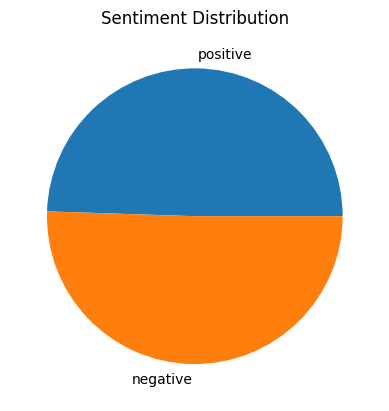

In [ ]:
plt.pie([len(positive),len(negative)], labels = imdb_df['sentiment'].unique())
plt.title('Sentiment Distribution')

In [ ]:
imdb_df.sentiment.replace("positive", 1, inplace=True)
imdb_df.sentiment.replace("negative", 2, inplace=True)
imdb_df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically theres a family where a little boy (...,2
4,Petter Matteis Love in the Time of Money is a ...,1
...,...,...
5582,In Bridgeport the deranged high school teacher...,2
5583,We all know a movie never does complete justic...,2
5584,The largest crowd to ever see a wrestling even...,1
5585,The second alternate Gundam universe tale (G-G...,1


In [ ]:
stop_words = set(stopwords.words('english'))
word_net_lemmatizer = WordNetLemmatizer()

In [ ]:
def lower_casing(text):
  return text.lower()

def tokenization(text):
  text_tokens = word_tokenize(text)
  #Stop Word Removal
  filtered_text = [w for w in text_tokens if not w in stop_words]
  return filtered_text

def lemmatization(text):
  text = [word_net_lemmatizer.lemmatize(word) for word in text]
  return text

def data_processing(text):
  # Lowering the Text
  text = lower_casing(text)
  text = re.sub('<br />', '', text)
  text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
  text = re.sub(r'\@w+|\#', '', text)
  text = re.sub(r'[^\w\s]', '', text)
  #Tokenizing the sentences
  text = tokenization(text)
  #lemmatizing the words
  text = lemmatization(text)
  text= " ".join(i for i in text)
  return text

In [ ]:
imdb_df['reviews'] = imdb_df['review'].apply(data_processing)

In [ ]:
del imdb_df['review']

In [ ]:
imdb_df

,sentiment,reviews
0,1,one reviewer mentioned watching 1 oz episode y...
1,1,wonderful little production filming technique ...
2,1,thought wonderful way spend time hot summer we...
3,2,basically there family little boy jake think t...
4,1,petter matteis love time money visually stunni...
...,...,...
5582,2,bridgeport deranged high school teacher richar...
5583,2,know movie never complete justice book excepti...
5584,1,largest crowd ever see wrestling event u took ...
5585,1,second alternate gundam universe tale ggundam ...


In [ ]:
vectorizer = TfidfVectorizer()
tfidf_vector_X = vectorizer.fit_transform(imdb_df['reviews']).toarray()
x_train, x_test, y_train, y_test = train_test_split(tfidf_vector_X, imdb_df['sentiment'], train_size=0.8, random_state=2408)

In [ ]:
sentiments = imdb_df['sentiment'].value_counts()
print('Sentiments in entire dataset:\n Positive: {}\n Negative: {}'.format(sentiments[1], sentiments[2]))
def get_sentiments(d, _d):
  positive = (d==1).sum()
  negative = (d==2).sum()
  print('Sentiments in {}:\n Positive: {}\n Negative: {}'.format(_d, positive, negative))
get_sentiments(y_train, 'Train data')
get_sentiments(y_test, 'Test data')

Sentiments in entire dataset:
 Positive: 2763
 Negative: 2821
Sentiments in Train data:
 Positive: 2222
 Negative: 2245
Sentiments in Test data:
 Positive: 541
 Negative: 576


In [ ]:
# def choose_vectorizer(option):
#   if option == 'generate':
#     vectorizer = TfidfVectorizer()
#   elif option == 'load':
#     vectorizer = TfidfVectorizer(vocabulary = pickle.load(open('vocabulary.pkl', 'rb')))
#   return vectorizer

# options = ['generate', 'load']
# # 0 to generate, 1 to load
# option = options[0]

# vectorizer = choose_vectorizer(option)
# vectorized_train_data = vectorizer.fit_transform(x_train)
# vectorized_test_data = vectorizer.transform(x_test)

# if option == 'generate':
#   pickle.dump(vectorizer.vocabulary_, open('vocabulary.pkl', 'wb'))

In [ ]:
# def get_max_length():
#     review_length = []
#     for review in x_train:
#         review_length.append(len(review))

#     return int(np.ceil(np.mean(review_length)))

In [ ]:
# ENCODE REVIEW

# vectorized_train_data = vectorizer.transform(x_train).toarray()  #//shape - (3,6)
# vectorized_test_data = vectorizer.transform(x_test).toarray() #//shape - (3,6)
# vectorized_train_data = vectorized_train_data[:, :, None] #//shape - (3,6,1)
# vectorized_test_data = vectorized_test_data[:, :, None] #//shape - (3,6,1)

# print('Encoded X Train\n', x_train, '\n')
# print('Encoded X Test\n', x_test, '\n')
# print('Maximum review length: ')

In [ ]:
x_train.shape

(4467, 53842)

In [ ]:
model = Sequential()
model.add(LSTM(units=6, input_shape = x_train.shape, return_sequences = True))
model.add(LSTM(units=6, return_sequences=True))
model.add(LSTM(units=6, return_sequences=True))
model.add(LSTM(units=1, return_sequences=True, name='output'))
model.compile(loss="mean_squared_error", optimizer='sgd', metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4467, 6)           1292376   
                                                                 
 lstm_1 (LSTM)               (None, 4467, 6)           312       
                                                                 
 lstm_2 (LSTM)               (None, 4467, 6)           312       
                                                                 
 output (LSTM)               (None, 4467, 1)           32        
                                                                 
Total params: 1293032 (4.93 MB)
Trainable params: 1293032 (4.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [ ]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Assuming x_train and y_train are your training data
train_history = model.fit(x_train[None, :, :], y_train[None, :], epochs=5, verbose=1, batch_size=64)


<ipython-input-30-53b7fce724ca>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  train_history = model.fit(x_train[None, :, :], y_train[None, :], epochs=5, verbose=1, batch_size=64)


Epoch 1/5
1/1 [==============================] - 16s 16s/step - loss: 2.5088 - accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 1s 1s/step - loss: 2.1836 - accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 1s 1s/step - loss: 1.8912 - accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 2s 2s/step - loss: 1.6767 - accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 2s 2s/step - loss: 1.5304 - accuracy: 0.0000e+00


In [ ]:
def show_train_history(train_history, train):
    plt.plot(train_history.history[train])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
# show_train_history(train_history, 'acc')

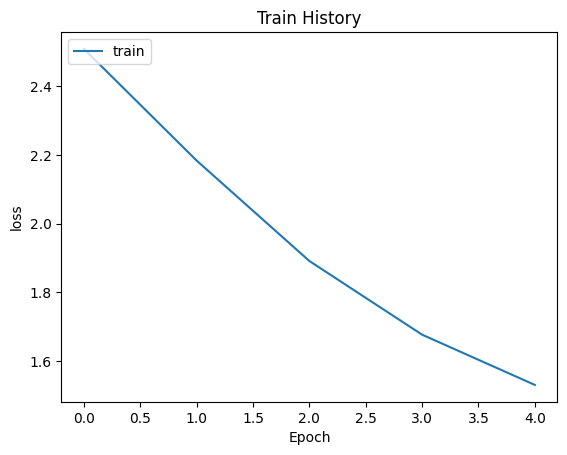

In [ ]:
show_train_history(train_history, 'loss')

In [ ]:
!pip install transformers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from transformers import DistilBertTokenizer, DistilBertModel
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Download nltk resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
bert_model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# Your data processing functions remain the same
stop_words = set(stopwords.words('english'))
word_net_lemmatizer = WordNetLemmatizer()

def lower_casing(text):
    return text.lower()

def tokenization(text):
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return filtered_text

def lemmatization(text):
    text = [word_net_lemmatizer.lemmatize(word) for word in text]
    return text

def data_processing(text):
    text = lower_casing(text)
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = tokenization(text)
    text = lemmatization(text)
    text = " ".join(i for i in text)
    return text

# Read your data
chunk_df = pd.read_csv('rk.csv', iterator=True, chunksize=10)
imdb_df = pd.concat(chunk_df, ignore_index=True)
imdb_df = imdb_df.head(10000)
del imdb_df['Unnamed: 0']
imdb_df.dropna(inplace=True)

# Apply data processing
imdb_df['reviews'] = imdb_df['review'].apply(data_processing)
del imdb_df['review']

# Tokenize and pad sequences
max_len = 128  # You can adjust this based on your data distribution

tokenized_texts = imdb_df['reviews'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=max_len, truncation=True)))
padded_texts = np.array([i + [0]*(max_len-len(i)) for i in tokenized_texts.values])

# Convert sentiments to numerical values
imdb_df['sentiment'].replace("positive", 1, inplace=True)
imdb_df['sentiment'].replace("negative", 0, inplace=True)

# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(padded_texts, imdb_df['sentiment'], train_size=0.8, random_state=2408)

# Convert data to PyTorch tensors
x_train_tensor = torch.tensor(x_train)
y_train_tensor = torch.tensor(y_train.values).float()

x_test_tensor = torch.tensor(x_test)
y_test_tensor = torch.tensor(y_test.values).float()

# Define the BERT model
class SentimentClassifier(nn.Module):
    def __init__(self):
        super(SentimentClassifier, self).__init__()
        self.bert = bert_model
        self.dropout = nn.Dropout(0.1)
        self.relu =  nn.ReLU()
        self.fc1 = nn.Linear(768, 512)
        self.fc2 = nn.Linear(512, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        last_hidden_state = outputs.last_hidden_state
        pooled_output = last_hidden_state[:, 0, :]
        pooled_output = self.dropout(pooled_output)
        pooled_output = self.fc1(pooled_output)
        pooled_output = self.relu(pooled_output)
        pooled_output = self.fc2(pooled_output)
        output = self.sigmoid(pooled_output)
        return output

# Initialize model and set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SentimentClassifier().to(device)

# Convert data to DataLoader
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# Define loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

# Train the model
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=(inputs > 0))
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()

        # Calculate training accuracy for this batch
        predicted_train = (outputs.cpu().squeeze() > 0.5).float()
        correct_train += (predicted_train == labels.cpu()).sum().item()
        total_train += labels.size(0)

    train_acc = correct_train / total_train
    print(f"Epoch [{epoch + 1}/{num_epochs}], Training Accuracy: {train_acc:.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(x_test_tensor.to(device), attention_mask=(x_test_tensor.to(device) > 0))
    test_predictions = (test_outputs.cpu().squeeze() > 0.5).float()
    acc = accuracy_score(y_test_tensor, test_predictions)
    print(f"Test Accuracy: {acc:.4f}")

# Print classification report
print(classification_report(y_test_tensor, test_predictions))



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Epoch [1/5], Training Accuracy: 0.7966
Epoch [2/5], Training Accuracy: 0.8921
Epoch [3/5], Training Accuracy: 0.9378
Epoch [4/5], Training Accuracy: 0.9664
Epoch [5/5], Training Accuracy: 0.9805
Test Accuracy: 0.8730
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88       567
         1.0       0.88      0.86      0.87       551

    accuracy                           0.87      1118
   macro avg       0.87      0.87      0.87      1118
weighted avg       0.87      0.87      0.87      1118



Epoch [1/5], Training Accuracy: 0.9962, Test Accuracy: 0.8614
Epoch [2/5], Training Accuracy: 0.9957, Test Accuracy: 0.8640
Epoch [3/5], Training Accuracy: 0.9975, Test Accuracy: 0.8694
Epoch [4/5], Training Accuracy: 0.9989, Test Accuracy: 0.8667
Epoch [5/5], Training Accuracy: 0.9949, Test Accuracy: 0.8569


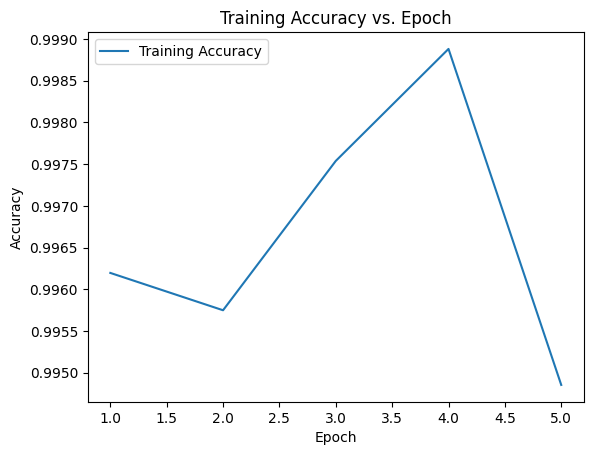

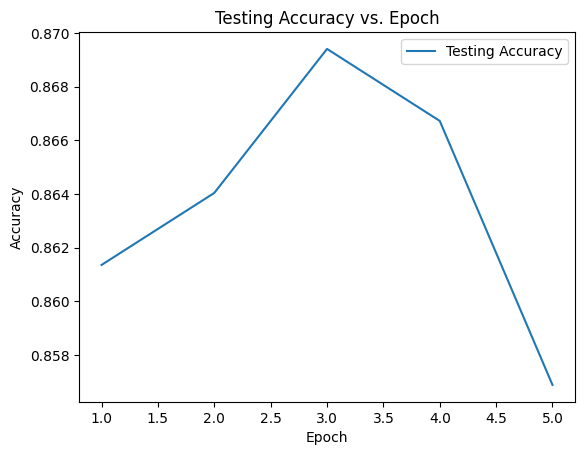

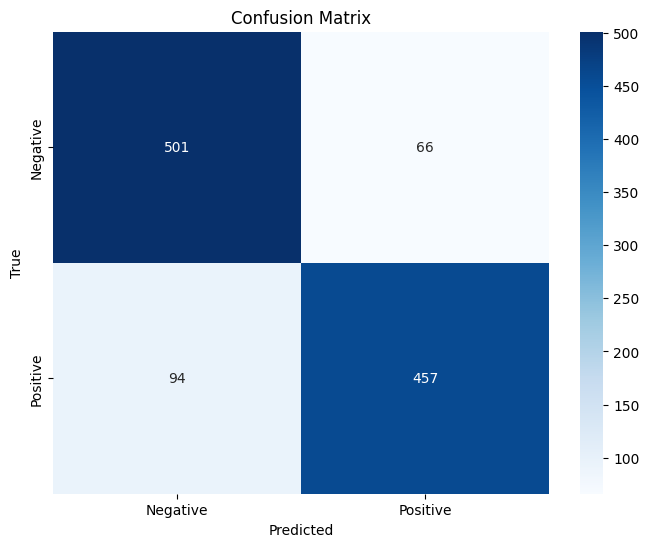

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from transformers import DistilBertTokenizer, DistilBertModel

# Lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Train the model
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=(inputs > 0))
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()

        # Calculate training accuracy for this batch
        predicted_train = (outputs.cpu().squeeze() > 0.5).float()
        correct_train += (predicted_train == labels.cpu()).sum().item()
        total_train += labels.size(0)

    # Append training accuracy for this epoch
    train_acc = correct_train / total_train
    train_accuracies.append(train_acc)

    # Evaluate the model on the test set
    model.eval()
    with torch.no_grad():
        test_outputs = model(x_test_tensor.to(device), attention_mask=(x_test_tensor.to(device) > 0))
        test_predictions = (test_outputs.cpu().squeeze() > 0.5).float()
        acc = accuracy_score(y_test_tensor, test_predictions)
        test_accuracies.append(acc)

    print(f"Epoch [{epoch + 1}/{num_epochs}], Training Accuracy: {train_acc:.4f}, Test Accuracy: {acc:.4f}")

# Plotting
epochs = range(1, num_epochs + 1)

# Plot Training vs. Epoch
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs. Epoch')
plt.legend()
plt.show()

# Plot Testing vs. Epoch
plt.plot(epochs, test_accuracies, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Testing Accuracy vs. Epoch')
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test_tensor, test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Epoch [1/5], Training Accuracy: 0.8139
Epoch [2/5], Training Accuracy: 0.8984
Epoch [3/5], Training Accuracy: 0.9451
Epoch [4/5], Training Accuracy: 0.9706
Epoch [5/5], Training Accuracy: 0.9821
Test Accuracy: 0.8625
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86       969
         1.0       0.88      0.85      0.86      1031

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



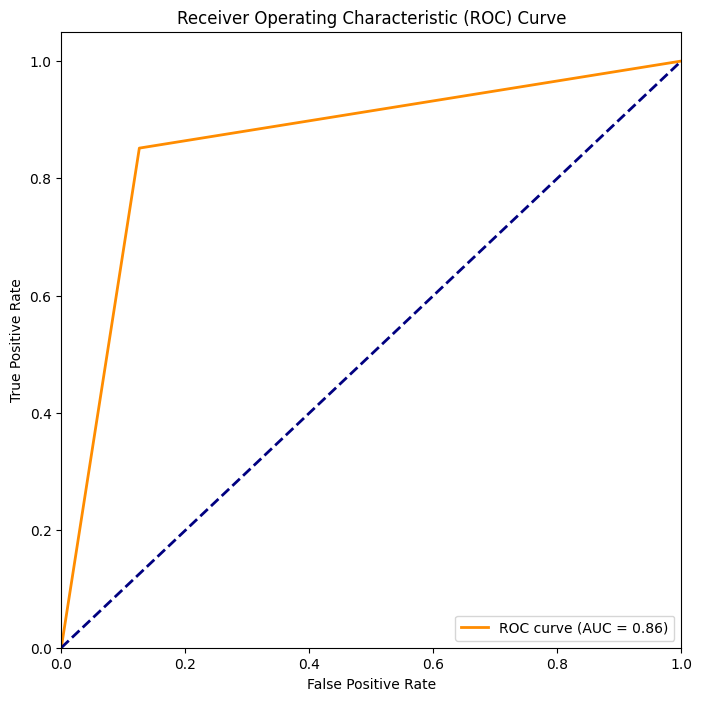

In [ ]:
!pip install transformers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc  # Added import for ROC curve
from transformers import DistilBertTokenizer, DistilBertModel
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Download nltk resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
bert_model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# Your data processing functions remain the same
stop_words = set(stopwords.words('english'))
word_net_lemmatizer = WordNetLemmatizer()

def lower_casing(text):
    return text.lower()

def tokenization(text):
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return filtered_text

def lemmatization(text):
    text = [word_net_lemmatizer.lemmatize(word) for word in text]
    return text

def data_processing(text):
    text = lower_casing(text)
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = tokenization(text)
    text = lemmatization(text)
    text = " ".join(i for i in text)
    return text

# Read your data
chunk_df = pd.read_csv('rk.csv', iterator=True, chunksize=10)
imdb_df = pd.concat(chunk_df, ignore_index=True)
imdb_df = imdb_df.head(10000)
del imdb_df['Unnamed: 0']
imdb_df.dropna(inplace=True)

# Apply data processing
imdb_df['reviews'] = imdb_df['review'].apply(data_processing)
del imdb_df['review']

# Tokenize and pad sequences
max_len = 128  # You can adjust this based on your data distribution

tokenized_texts = imdb_df['reviews'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=max_len, truncation=True)))
padded_texts = np.array([i + [0]*(max_len-len(i)) for i in tokenized_texts.values])

# Convert sentiments to numerical values
imdb_df['sentiment'].replace("positive", 1, inplace=True)
imdb_df['sentiment'].replace("negative", 0, inplace=True)

# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(padded_texts, imdb_df['sentiment'], train_size=0.8, random_state=2408)

# Convert data to PyTorch tensors
x_train_tensor = torch.tensor(x_train)
y_train_tensor = torch.tensor(y_train.values).float()

x_test_tensor = torch.tensor(x_test)
y_test_tensor = torch.tensor(y_test.values).float()

# Define the BERT model
class SentimentClassifier(nn.Module):
    def __init__(self):
        super(SentimentClassifier, self).__init__()
        self.bert = bert_model
        self.dropout = nn.Dropout(0.1)
        self.relu =  nn.ReLU()
        self.fc1 = nn.Linear(768, 512)
        self.fc2 = nn.Linear(512, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        last_hidden_state = outputs.last_hidden_state
        pooled_output = last_hidden_state[:, 0, :]
        pooled_output = self.dropout(pooled_output)
        pooled_output = self.fc1(pooled_output)
        pooled_output = self.relu(pooled_output)
        pooled_output = self.fc2(pooled_output)
        output = self.sigmoid(pooled_output)
        return output

# Initialize model and set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SentimentClassifier().to(device)

# Convert data to DataLoader
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# Define loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

# Train the model
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=(inputs > 0))
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()

        # Calculate training accuracy for this batch
        predicted_train = (outputs.cpu().squeeze() > 0.5).float()
        correct_train += (predicted_train == labels.cpu()).sum().item()
        total_train += labels.size(0)

    train_acc = correct_train / total_train
    print(f"Epoch [{epoch + 1}/{num_epochs}], Training Accuracy: {train_acc:.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(x_test_tensor.to(device), attention_mask=(x_test_tensor.to(device) > 0))
    test_predictions = (test_outputs.cpu().squeeze() > 0.5).float()
    acc = accuracy_score(y_test_tensor, test_predictions)
    print(f"Test Accuracy: {acc:.4f}")

# Print classification report
print(classification_report(y_test_tensor, test_predictions))

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_tensor, test_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
